# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt

from scipy import stats

### Dataset Loading

In [133]:
# Load Dataset
df1=pd.read_excel('/content/drive/MyDrive/data_airline_reviews.xlsx')

### Dataset First View

In [134]:
# Dataset First Look
df1.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [135]:
# Dataset Rows & Columns count
df1.shape

(131895, 17)

### Dataset Information

In [136]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [137]:
# Dataset Duplicate Value Count
df1.duplicated().sum()

70711

#### Missing Values/Null Values

In [138]:
# Missing Values/Null Values Count
df1.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

<Axes: >

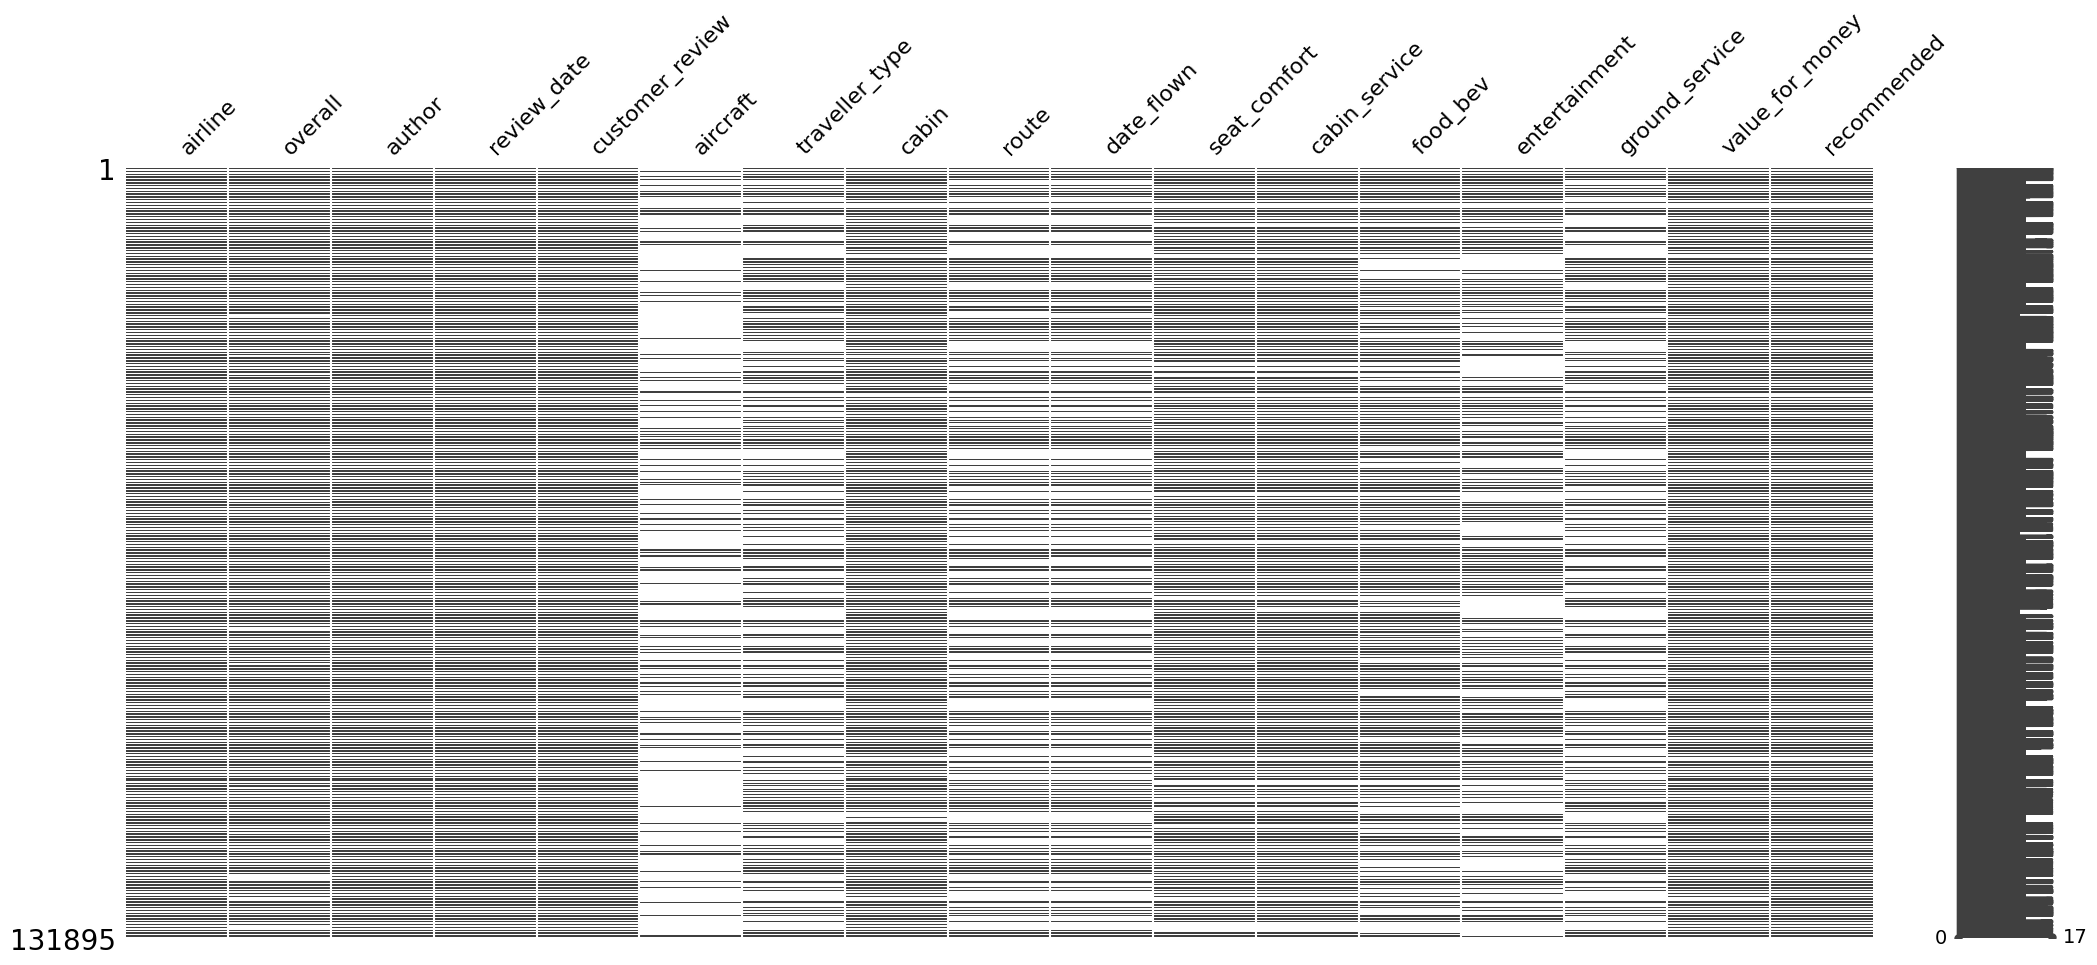

In [139]:
# Visualizing the missing values
msno.matrix(df1)

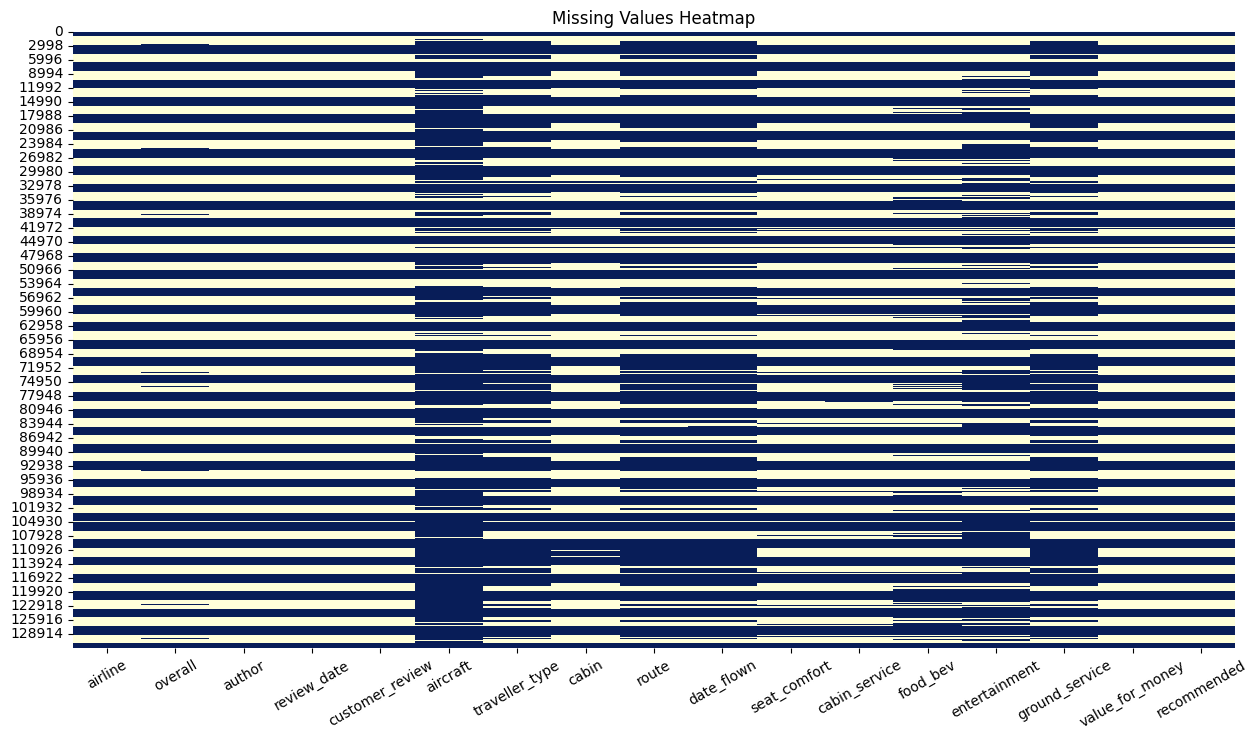

In [140]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.isnull(), cbar=False, cmap='YlGnBu')
plt.title('Missing Values Heatmap')
plt.xticks(rotation=30)
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [141]:
# Dataset Columns
df1.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [142]:
# Dataset Describe
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,64017.0,5.145430,3.477532,1.0,1.0,5.0,9.0,10.0
seat_comfort,60681.0,2.952160,1.441362,1.0,1.0,3.0,4.0,5.0
cabin_service,60715.0,3.191814,1.565789,1.0,2.0,3.0,5.0,5.0
food_bev,52608.0,2.908170,1.481893,1.0,1.0,3.0,4.0,5.0
entertainment,44193.0,2.863372,1.507262,1.0,1.0,3.0,4.0,5.0
ground_service,39358.0,2.692820,1.612215,1.0,1.0,3.0,4.0,5.0
value_for_money,63975.0,2.943962,1.587370,1.0,1.0,3.0,4.0,5.0


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [143]:
# Check Unique Values for each variable.
dict_uniq_value={}
dict_uniq_cnt={}
for i in df1.columns:
  dict_uniq_value[i]=df1[i].unique()
  dict_uniq_cnt[i]=len(df1[i].unique())

In [144]:
print(dict_uniq_value['airline'])
print(dict_uniq_cnt['airline'])

[nan 'Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' 'Air China'
 'Cathay Pacific Airways' 'Wi

In [145]:
for i in df1.columns.tolist():
  print("No. of unique values in ",i,"is",df1[i].nunique())

No. of unique values in  airline is 81
No. of unique values in  overall is 10
No. of unique values in  author is 44069
No. of unique values in  review_date is 3015
No. of unique values in  customer_review is 61172
No. of unique values in  aircraft is 2088
No. of unique values in  traveller_type is 4
No. of unique values in  cabin is 4
No. of unique values in  route is 24549
No. of unique values in  date_flown is 63
No. of unique values in  seat_comfort is 5
No. of unique values in  cabin_service is 5
No. of unique values in  food_bev is 5
No. of unique values in  entertainment is 5
No. of unique values in  ground_service is 5
No. of unique values in  value_for_money is 5
No. of unique values in  recommended is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [149]:
# Write your code to make your dataset analysis ready.
df=df1.copy()

In [150]:
df.drop_duplicates(inplace=True)

In [151]:
df.reset_index(drop=True, inplace=True)

In [152]:
df.shape

(61184, 17)

In [153]:
df.isnull().sum().sort_values(ascending=False)

aircraft           42696
ground_service     24015
date_flown         23750
route              23671
traveller_type     23644
entertainment      20954
food_bev           12843
seat_comfort        4973
cabin_service       4944
cabin               2479
value_for_money     1857
overall             1783
recommended         1423
customer_review        1
review_date            1
author                 1
airline                1
dtype: int64

In [154]:
df.drop(columns=(['author','customer_review','route']),axis=1,inplace=True)

In [155]:
df.drop(columns=['aircraft'],axis=1,inplace=True)

In [156]:
df.isnull().sum().sort_values(ascending=False)

ground_service     24015
date_flown         23750
traveller_type     23644
entertainment      20954
food_bev           12843
seat_comfort        4973
cabin_service       4944
cabin               2479
value_for_money     1857
overall             1783
recommended         1423
airline                1
review_date            1
dtype: int64

In [157]:
df.dropna(subset=(['ground_service','entertainment']),inplace=True)

In [158]:
df.isnull().sum().sort_values(ascending=False)

food_bev           782
cabin               13
date_flown          10
traveller_type       2
overall              1
seat_comfort         1
cabin_service        1
airline              0
review_date          0
entertainment        0
ground_service       0
value_for_money      0
recommended          0
dtype: int64

In [159]:
df['food_bev'].fillna(df['food_bev'].mean(),inplace=True)

In [160]:
df.dropna(inplace=True)

In [161]:
df.isnull().sum()

airline            0
overall            0
review_date        0
traveller_type     0
cabin              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [162]:
df.shape

(23606, 13)

In [163]:
df.reset_index(drop=True, inplace=True)

In [164]:
df.head()

,airline,overall,review_date,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,8th May 2019,Business,Economy Class,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,7th May 2019,Family Leisure,Economy Class,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,7th May 2019,Business,Economy Class,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,6th May 2019,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,6th May 2019,Solo Leisure,Economy Class,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23606 entries, 0 to 23605
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          23606 non-null  object 
 1   overall          23606 non-null  float64
 2   review_date      23606 non-null  object 
 3   traveller_type   23606 non-null  object 
 4   cabin            23606 non-null  object 
 5   date_flown       23606 non-null  object 
 6   seat_comfort     23606 non-null  float64
 7   cabin_service    23606 non-null  float64
 8   food_bev         23606 non-null  float64
 9   entertainment    23606 non-null  float64
 10  ground_service   23606 non-null  float64
 11  value_for_money  23606 non-null  float64
 12  recommended      23606 non-null  object 
dtypes: float64(7), object(6)
memory usage: 2.3+ MB


<Axes: >

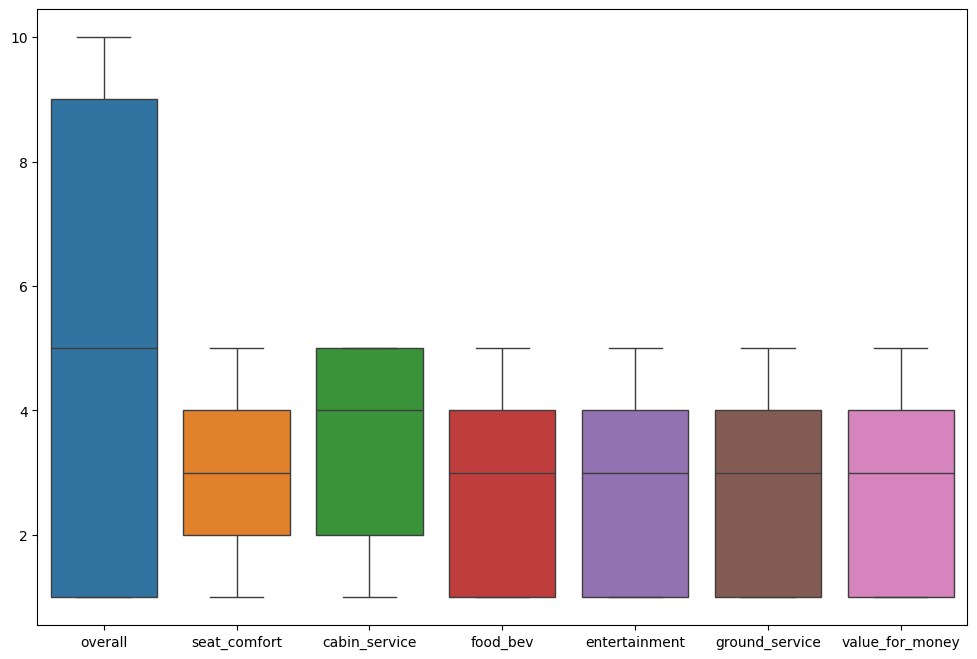

In [166]:
plt.figure(figsize=(12,8))
sns.boxplot(df)

#**Data manipulation**

In [168]:
df['review_date'] = df['review_date'].str.replace(r'\b(\d+)(st|nd|rd|th)\b', r'\1', regex=True)
d_type={'overall':'int8','review_date':'datetime64[ns]','seat_comfort':'int8','cabin_service':'int8','food_bev':'int8','entertainment':'int8',
        'ground_service':'int8',
        'value_for_money':'int8'}
for i,j in d_type.items():
  df[i]=df[i].astype(j)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23606 entries, 0 to 23605
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          23606 non-null  object        
 1   overall          23606 non-null  int8          
 2   review_date      23606 non-null  datetime64[ns]
 3   traveller_type   23606 non-null  object        
 4   cabin            23606 non-null  object        
 5   date_flown       23606 non-null  object        
 6   seat_comfort     23606 non-null  int8          
 7   cabin_service    23606 non-null  int8          
 8   food_bev         23606 non-null  int8          
 9   entertainment    23606 non-null  int8          
 10  ground_service   23606 non-null  int8          
 11  value_for_money  23606 non-null  int8          
 12  recommended      23606 non-null  object        
dtypes: datetime64[ns](1), int8(7), object(5)
memory usage: 1.2+ MB


In [170]:
df['date_flown']=pd.to_datetime(df['date_flown'], errors='coerce')

In [171]:
rename_col={'overall':'overall_rating','date_flown':'departure_date'}
df.rename(columns=rename_col,inplace=True)

In [172]:
df.head()

,airline,overall_rating,review_date,traveller_type,cabin,departure_date,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7,2019-05-08,Business,Economy Class,2019-05-01,4,5,4,4,2,4,yes
1,Turkish Airlines,2,2019-05-07,Family Leisure,Economy Class,2019-05-01,4,1,1,1,1,1,no
2,Turkish Airlines,3,2019-05-07,Business,Economy Class,2019-05-01,1,4,1,3,1,2,no
3,Turkish Airlines,10,2019-05-06,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,5,yes
4,Turkish Airlines,1,2019-05-06,Solo Leisure,Economy Class,2019-05-01,1,1,1,1,1,1,no


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23606 entries, 0 to 23605
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          23606 non-null  object        
 1   overall_rating   23606 non-null  int8          
 2   review_date      23606 non-null  datetime64[ns]
 3   traveller_type   23606 non-null  object        
 4   cabin            23606 non-null  object        
 5   departure_date   23606 non-null  datetime64[ns]
 6   seat_comfort     23606 non-null  int8          
 7   cabin_service    23606 non-null  int8          
 8   food_bev         23606 non-null  int8          
 9   entertainment    23606 non-null  int8          
 10  ground_service   23606 non-null  int8          
 11  value_for_money  23606 non-null  int8          
 12  recommended      23606 non-null  object        
dtypes: datetime64[ns](2), int8(7), object(4)
memory usage: 1.2+ MB


### What all manipulations have you done and insights you found?

In [98]:
df.head()

,airline,overall_rating,review_date,traveller_type,cabin,departure_date,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7,2019-05-08,Business,Economy Class,2019-05-01,4,5,4,4,2,4,yes
1,Turkish Airlines,2,2019-05-07,Family Leisure,Economy Class,2019-05-01,4,1,1,1,1,1,no
2,Turkish Airlines,3,2019-05-07,Business,Economy Class,2019-05-01,1,4,1,3,1,2,no
3,Turkish Airlines,10,2019-05-06,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,5,yes
4,Turkish Airlines,1,2019-05-06,Solo Leisure,Economy Class,2019-05-01,1,1,1,1,1,1,no


Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

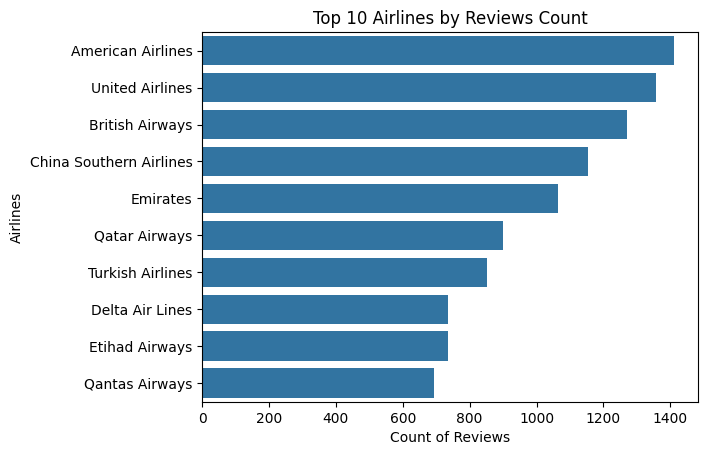

In [100]:
# Count the number of reviews for each airline, select the top 10, and reset index
air_cnt = df['airline'].value_counts().sort_values(ascending=False).head(10)

# Create horizontal bar plot
sns.barplot(x=air_cnt.values, y=air_cnt.index, orient='h')

# Set labels and title
plt.xlabel('Count of Reviews')
plt.ylabel('Airlines')
plt.title('Top 10 Airlines by Reviews Count')

# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [101]:
# Chart - 2 visualization code
cab_cnt=df['cabin'].value_counts().reset_index()

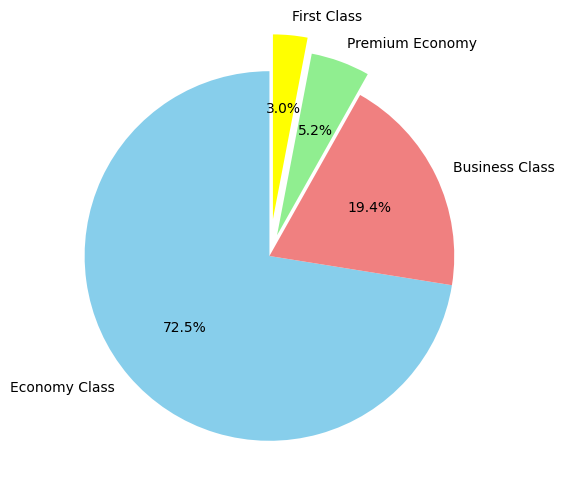

In [112]:

# Calculate the counts of each cabin type
cabin_counts = df['cabin'].value_counts()

# Create a figure and set its size
plt.figure(figsize=(8, 6))

# Create a pie chart
plt.pie(cabin_counts.values,
        labels=cabin_counts.index,
        autopct='%1.1f%%',
        explode=[0, 0, 0.12, 0.2],  # Explode some slices for emphasis
        startangle=90,
        colors=['skyblue', 'lightcoral', 'lightgreen', 'yellow'])


# Show the pie chart
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<ipython-input-119-35d903f94acc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=most_trav.index, y=most_trav.values, palette='Dark2')
<ipython-input-119-35d903f94acc>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels


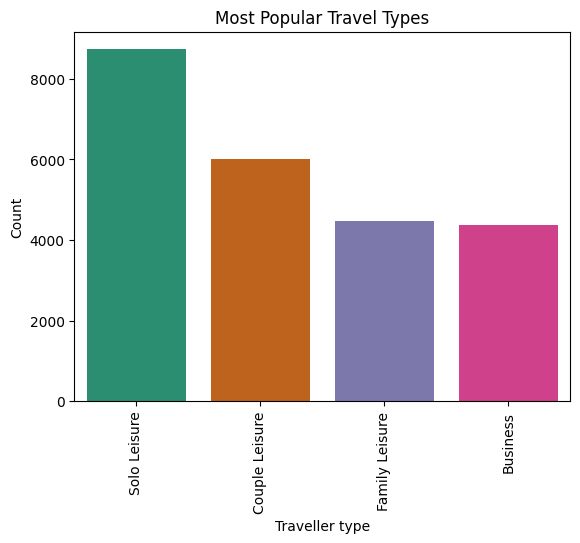

In [119]:
# Calculate the counts of each traveler type
most_trav = df["traveller_type"].value_counts()

# Create bar plot with rotated labels
ax = sns.barplot(x=most_trav.index, y=most_trav.values, palette='Dark2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels

# Set labels and title
plt.xlabel('Traveller type')
plt.ylabel('Count')
plt.title('Most Popular Travel Types')

# Show plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<ipython-input-120-deaebebbbbf2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=overall['airline'],x = overall['overall_rating'] ,palette = 'Dark2')


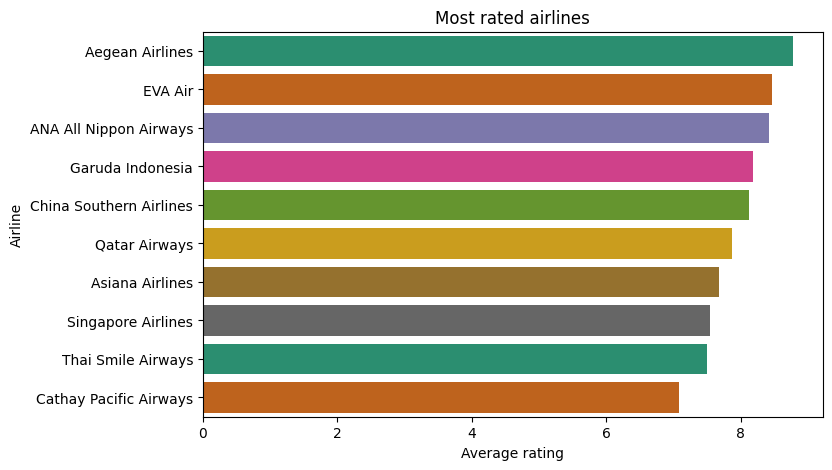

In [120]:
# Chart - 4 visualization code
plt.figure(figsize= (8,5))
overall = df.groupby(df['airline'])['overall_rating'].mean().sort_values(ascending = False).head(10).reset_index()
sns.barplot(y=overall['airline'],x = overall['overall_rating'] ,palette = 'Dark2')
plt.xlabel('Average rating')
plt.ylabel('Airline')
plt.title('Most rated airlines')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<ipython-input-121-5f3597888534>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=val['airline'],x = val['value_for_money'] ,palette = 'viridis')


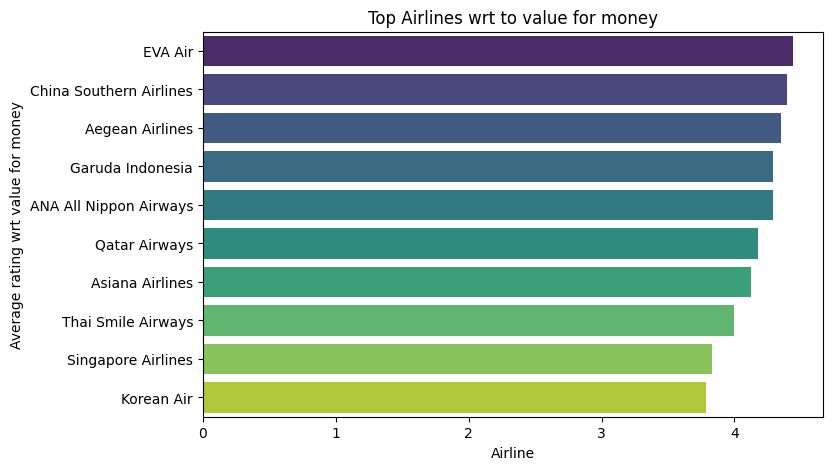

In [121]:
# Chart - 5 visualization code
plt.figure(figsize= (8,5))
val = df.groupby(df['airline'])['value_for_money'].mean().sort_values(ascending = False).head(10).reset_index()
sns.barplot(y=val['airline'],x = val['value_for_money'] ,palette = 'viridis')
plt.ylabel('Average rating wrt value for money')
plt.xlabel('Airline')
plt.title('Top Airlines wrt to value for money')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<ipython-input-122-973b7e0b92b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=seat['airline'],x = seat['seat_comfort'] ,palette = 'husl')


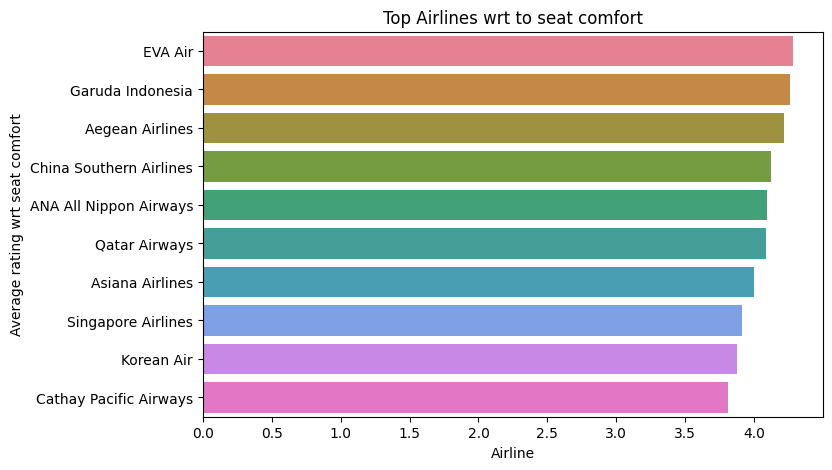

In [122]:
# Chart - 6 visualization code
plt.figure(figsize= (8,5))
seat = df.groupby(df['airline'])['seat_comfort'].mean().sort_values(ascending = False).head(10).reset_index()
sns.barplot(y=seat['airline'],x = seat['seat_comfort'] ,palette = 'husl')
plt.ylabel('Average rating wrt seat comfort')
plt.xlabel('Airline')
plt.title('Top Airlines wrt to seat comfort')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

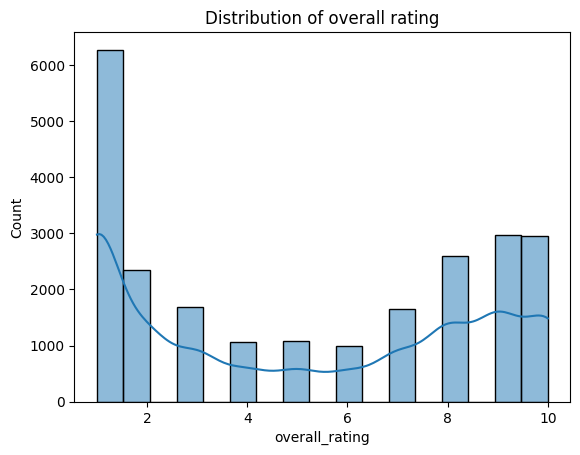

In [123]:
# Chart - 7 visualization
sns.histplot(df['overall_rating'], kde = True)
plt.title('Distribution of overall rating')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

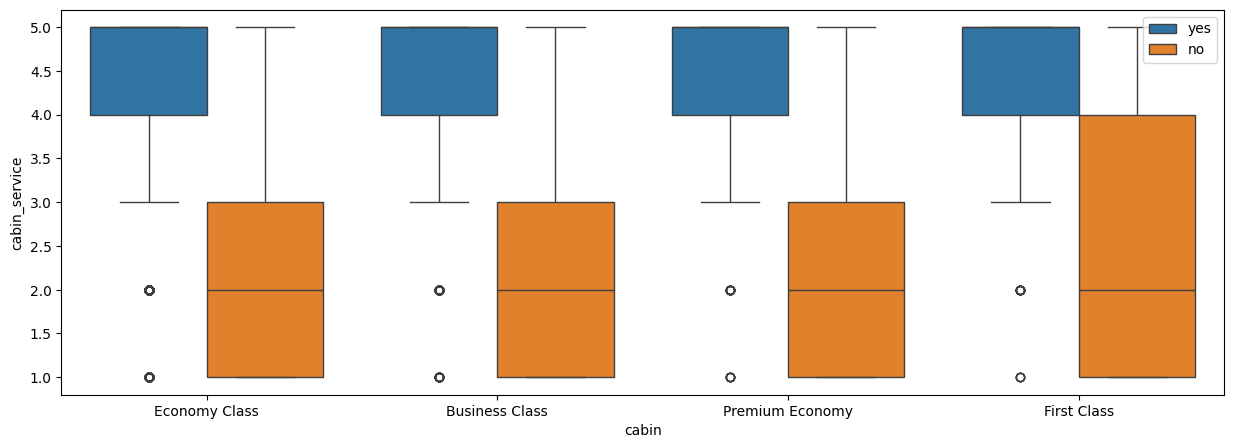

In [124]:
# Chart - 8 visualization code
plt.figure(figsize=(15,5))
sns.boxplot(x=df['cabin'], y=df['cabin_service'], hue = df['recommended'])
plt.legend(loc='upper right')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<Axes: xlabel='month_name', ylabel='count'>

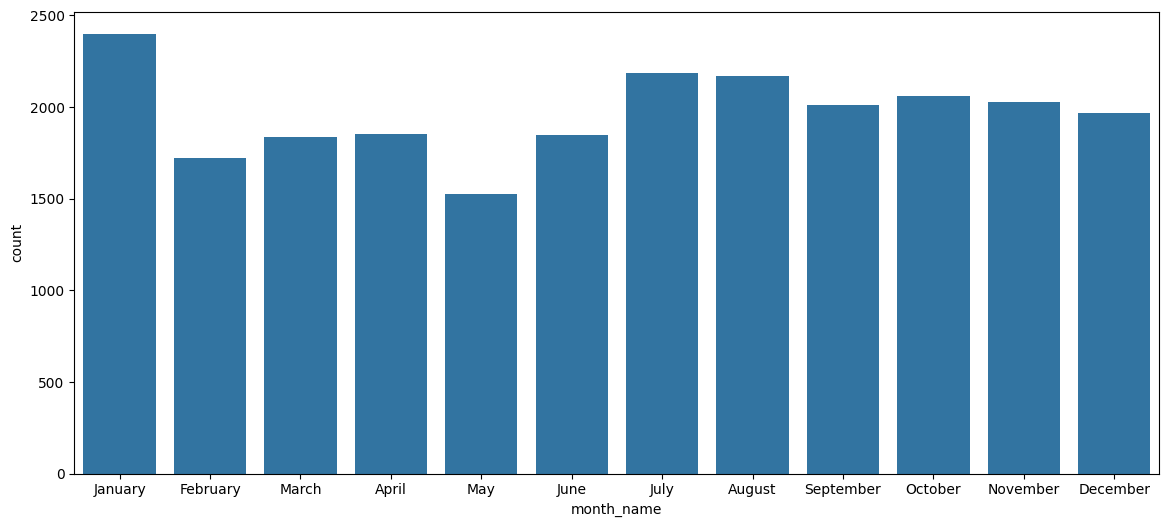

In [125]:
# Chart - 9 visualization code
plt.figure(figsize= (14,6))
df['month_name'] = df['review_date'].dt.strftime('%B')
df['month'] = df['review_date'].dt.month
df2 = df[['month_name','month']].value_counts().reset_index().sort_values(by = 'month')
df2.rename(columns={0:'count'},inplace = True)
sns.barplot(x = df2['month_name'], y = df2['count'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<ipython-input-126-2fc115c2a684>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=seat['airline'],x = seat['ground_service'] ,palette = 'colorblind')


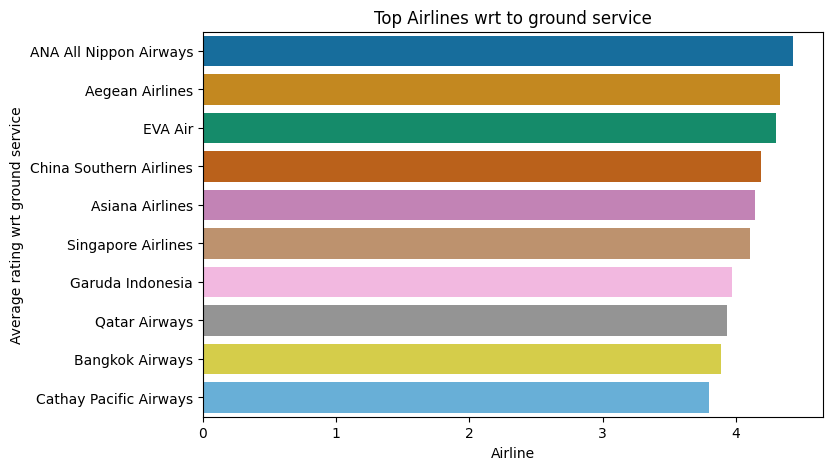

In [126]:
plt.figure(figsize= (8,5))
seat = df.groupby(df['airline'])['ground_service'].mean().sort_values(ascending = False).head(10).reset_index()
sns.barplot(y=seat['airline'],x = seat['ground_service'] ,palette = 'colorblind')
plt.ylabel('Average rating wrt ground service')
plt.xlabel('Airline')
plt.title('Top Airlines wrt to ground service')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

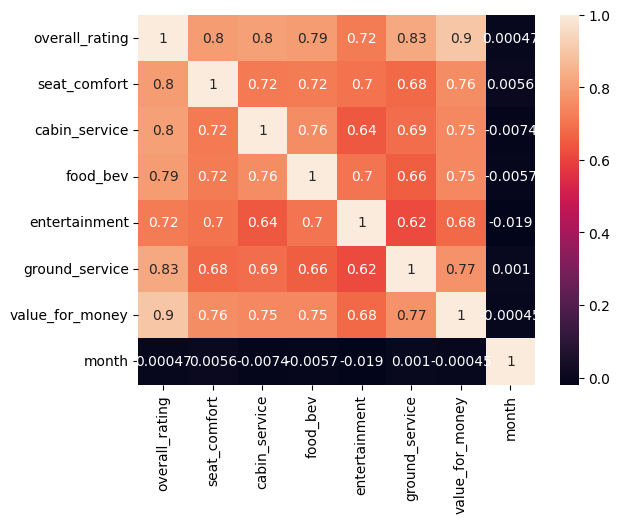

In [131]:
# Correlation Heatmap visualization code
# Selecting only the numeric columns
numeric_df = df.select_dtypes(include='number')

# Creating the correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True)

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

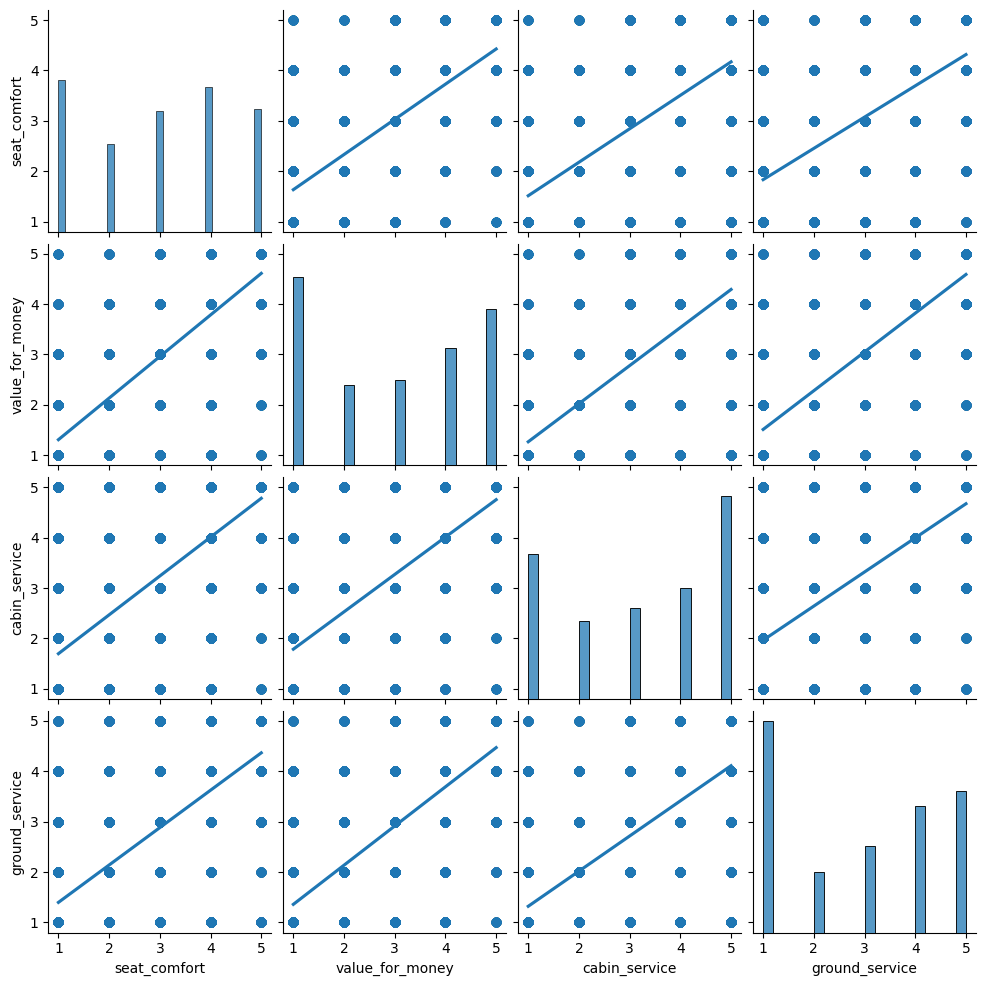

In [129]:
# Pair Plot visualization code
column_name = [ 'seat_comfort','value_for_money','cabin_service','ground_service']
pairplot_data = df[column_name]
# sns.set_palette("coolwarm",desat=0.5)
chart15=sns.pairplot(pairplot_data,kind = 'reg')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

In [173]:
(df[df['airline']=='Qatar Airways']['overall_rating']).count()

899

In [174]:
# Perform Statistical Test to obtain P-Value


# Calculate the means and standard deviations of the two halves
mean1 = (df[df['airline']=='Qatar Airways']['overall_rating']).mean()
mean2 = (df[df['airline']=='EVA Air']['overall_rating']).mean()
std1 = (df[df['airline']=='Qatar Airways']['overall_rating']).std()
std2 = (df[df['airline']=='EVA Air']['overall_rating']).std()

# Calculate the sample sizes
n1 = (df[df['airline']=='Qatar Airways']['overall_rating']).count()
n2 = (df[df['airline']=='EVA Air']['overall_rating']).count()

se1 = std1 / np.sqrt(n1)
se2 = std2 / np.sqrt(n2)

# Calculate the standard error of the difference between means
standard_error = np.sqrt(se1**2 + se2**2)

# Calculate the t_test
t_stat = (mean1 - mean2) / standard_error

#Significance level
alpha = 0.05

#Degree of freedom
dodf = n1 + n2 - 2
#calculating probability point function
cv = stats.t.ppf(1.0 - alpha, dodf)

# Calculate the p-value (two-tailed test)
p_value = (1 - stats.t.cdf(abs(t_stat), dodf)) * 2

# Set the significance level
alpha = 0.05

print('The p value for 0.05 significance level is {:.5f}'.format(p_value))

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")

The p value for 0.05 significance level is 0.00019
Reject the null hypothesis. There is a significant difference in means.


Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***